In [117]:
# info in one array
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from ipywidgets import IntProgress
from IPython.display import display
import winsound
import cv2
import numpy as np
import os

f = IntProgress(min=0, max=len(listdir('symbolsforanalyzer')))
display(f)
characters = []
for i in range(len(listdir('symbolsforanalyzer'))):
    characters.append([0] * 2)
print(characters)

symbols_num = 0
symbols = list()

# filename format x y (top left corner) then x y size
for i in range(0,len(listdir('symbolsforanalyzer/'))):
    f.value +=1
    _location = list()
    j = 0
    filename = listdir('symbolsforanalyzer/')[i]
    for symbol in filename:
        if symbol == '_' or symbol == '.':
            _location.append(j)
        j += 1
    print(_location)
    x_left = int(filename[0:_location[0]])
    # when do [#:#] the last # is not included in there y_up
    print(x_left)
    y_up = int(filename[_location[0]+1:_location[1]])
    print(y_up)
    x_size = int(filename[_location[1]+1:_location[2]])
    print(x_size)
    y_size = int(filename[_location[2]+1:_location[3]])
    print(y_size)
    #img_label.append(filename[_location[3]+1:_location[4]])
    characters[i].append(filename[_location[3]+1:_location[4]])
    print(filename[_location[3]+1:_location[4]])
    #img_x.append(int(x_left+x_size / 2))
    characters[i][0] = int(x_left+x_size / 2)
    print(int(x_left+x_size / 2))
    #img_y.append(int(y_up+y_size / 2))
    characters[i][1] = int(y_up+y_size / 2)
    
    if characters[i][2] in ['plus', 'times', '-']:
        symbols_num += 1
        symbols.append(character[i])
    print(int(y_up+y_size / 2))
    print(filename)
    print(symbols)
    print(symbols_num)

print(characters)
#print(type(characters))    

IntProgress(value=0, max=12)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[3, 7, 10, 14, 16]
231
289
62
128
5
262
353
231_289_62_128_5.png
[]
0
[3, 7, 10, 14, 16]
236
474
84
144
6
278
546
236_474_84_144_6.png
[]
0
[3, 7, 10, 14, 16]
251
131
16
116
1
259
189
251_131_16_116_1.png
[]
0
[3, 7, 10, 14, 16]
372
126
96
139
2
420
195
372_126_96_139_2.png
[]
0
[3, 7, 10, 14, 16]
378
286
63
128
6
409
350
378_286_63_128_6.png
[]
0
[3, 5, 8, 11, 13]
406
7
13
67
1
412
40
406_7_13_67_1.png
[]
0
[3, 7, 10, 14, 16]
407
472
61
140
8
437
542
407_472_61_140_8.png
[]
0
[3, 7, 11, 15, 17]
548
269
121
126
7
608
332
548_269_121_126_7.png
[]
0
[3, 7, 10, 14, 16]
551
132
66
127
3
584
195
551_132_66_127_3.png
[]
0
[3, 7, 10, 14, 16]
594
478
76
127
0
632
541
594_478_76_127_0.png
[]
0
[2, 6, 10, 13, 15]
70
428
673
45
-
406
450
70_428_673_45_-.png
[[406, 450, '-']]
1
[2, 6, 9, 13, 18]
81
312
71
109
plus
116
366
81_312_71_109_plus.png
[[406, 450, '-'], [116, 366, 'plus']]
2
[[262, 353, '5'], 

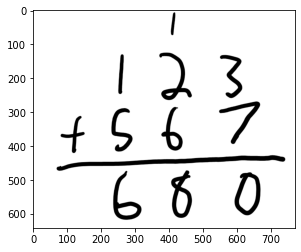

In [118]:
test_img = cv2.imread('testequations/testequation5.png')
pyplot.imshow(test_img)
pyplot.show()

In [119]:
def getYFromChar(item):
    return item[1]
symbols.sort(key = getYFromChar)
print(symbols)
operators = list()
operators.append(symbols[0])
lines  = list()
lines.append(symbols[1])
print(lines)
print(operators)

[[116, 366, 'plus'], [406, 450, '-']]
[[406, 450, '-']]
[[116, 366, 'plus']]


In [120]:
# with big character list, organize into layers
y_thresh = 20
x_thresh = 30
row = np.zeros(len(img_label), dtype=int)
col = np.zeros(len(img_label), dtype=int)
def getYFromChar(item):
    return item[1]
characters.sort(reverse = True, key = getYFromChar)
print(characters)

#compare next char to first, layer higher the layer number the more up it is
for i in range(0,len(character)-1):
    #print(characters[i + 1][1])
    #print(characters[i][1]+y_thresh)
    #print(characters[i][1]-y_thresh)
    #print(characters[i][1])
    #print((characters[i + 1][1] < characters[i][1] - y_thresh) and (character[i + 1][1] > character[i][1] - y_thresh))
    if np.absolute(characters[i + 1][1] - characters[i][1]) < y_thresh:
        row[i + 1] = row[i]
    elif characters[i + 1][1] - characters[i][1] >= y_thresh:
        row[i + 1] = row[i] - 1
    elif characters[i + 1][1] - characters[i][1] <= y_thresh:
        row[i + 1] = row[i] + 1
print(row)

def getXFromChar(item):
    return item[0]
characters.sort(reverse = False, key = getXFromChar)
print(characters)
for i in range(len(character)-1):
    if np.absolute(characters[i + 1][0] - characters[i][0]) < x_thresh or (character[i + 1][0] == lines[0][0] and character[i + 1][1] == lines[0][1] and character[i + 1][2] == lines[0][2]):
        col[i + 1] = col[i]
    elif characters[i + 1][0] - characters[i][0] >= x_thresh:
        col[i + 1] = col[i] + 1
    elif characters[i + 1][0] - characters[i][0] <= x_thresh:
        col[i + 1] = col[i] - 1
print(col)

[[278, 546, '6'], [437, 542, '8'], [632, 541, '0'], [406, 450, '-'], [116, 366, 'plus'], [262, 353, '5'], [409, 350, '6'], [608, 332, '7'], [420, 195, '2'], [584, 195, '3'], [259, 189, '1'], [412, 40, '1']]
[0 0 0 1 2 2 2 2 3 3 3 4]
[[116, 366, 'plus'], [259, 189, '1'], [262, 353, '5'], [278, 546, '6'], [406, 450, '-'], [409, 350, '6'], [412, 40, '1'], [420, 195, '2'], [437, 542, '8'], [584, 195, '3'], [608, 332, '7'], [632, 541, '0']]
[0 1 1 1 2 2 2 2 2 3 3 3]


In [121]:
i = 0
characters.sort(reverse = True, key = getYFromChar)
for r in row:
    characters[i].append(r)
    i += 1
characters.sort(reverse = False, key = getXFromChar)
i = 0
for c in col:
    characters[i].append(c)
    i += 1
# x, y, label, r, c in character
print(characters)


[[116, 366, 'plus', 2, 0], [259, 189, '1', 3, 1], [262, 353, '5', 2, 1], [278, 546, '6', 0, 1], [406, 450, '-', 1, 2], [409, 350, '6', 2, 2], [412, 40, '1', 4, 2], [420, 195, '2', 3, 2], [437, 542, '8', 0, 2], [584, 195, '3', 3, 3], [608, 332, '7', 2, 3], [632, 541, '0', 0, 3]]


In [ ]:
#If addition
